### Hotel Booking demand

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/booking.csv')

# observamos los primeros valores
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Informacion sobre columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Describimos las variables numericas
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


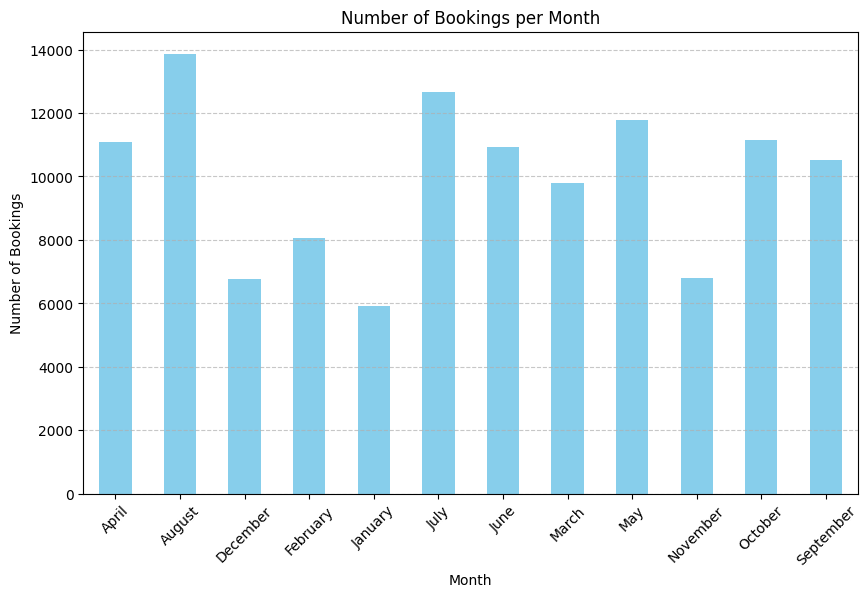

In [5]:
#Insight #1
# Graficamos la cantidad de reservas por cada mes usando un grafico de barras

bookings_per_month = df['arrival_date_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bookings_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


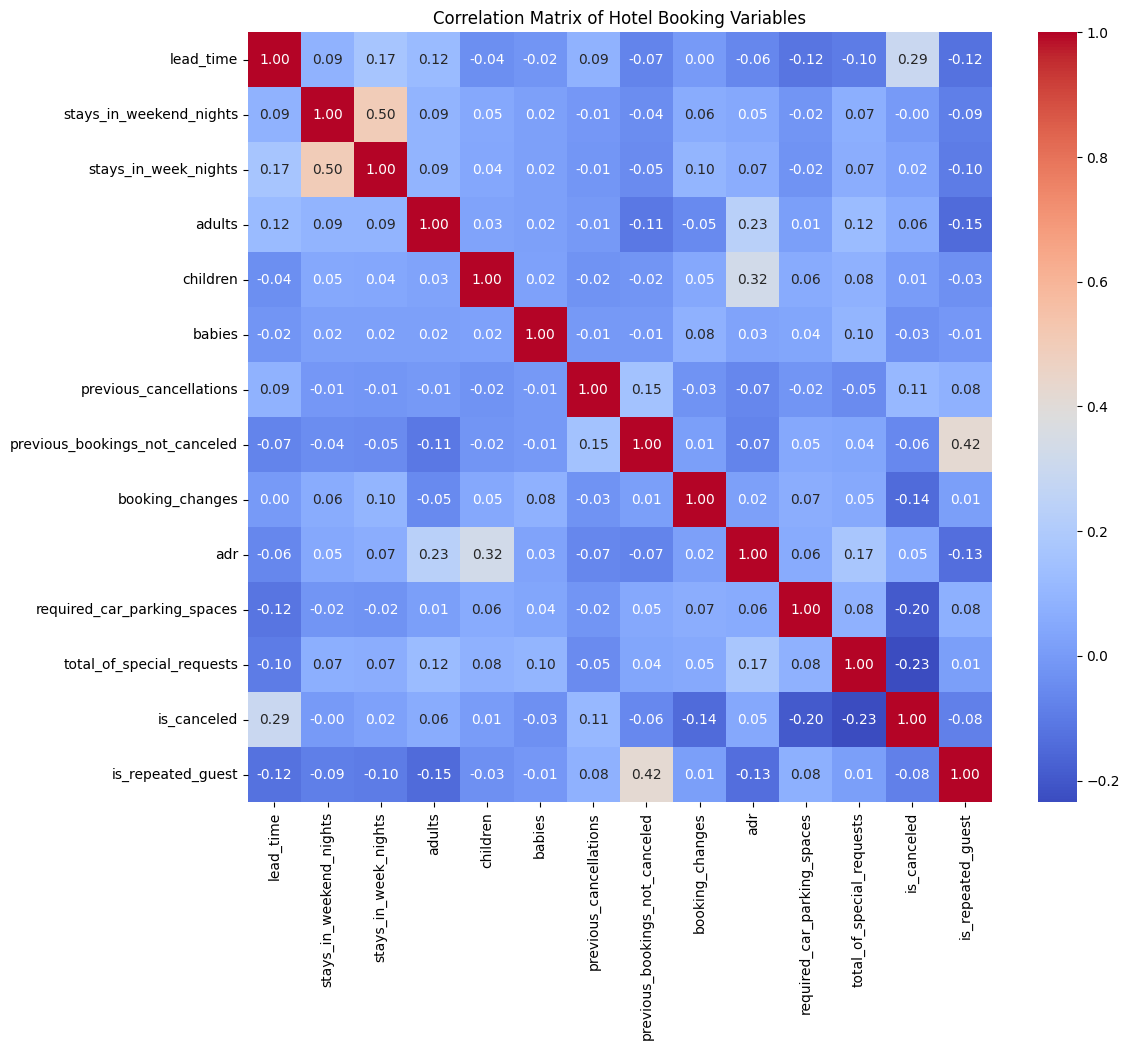

In [6]:
#Insight #2
# Calculamos una matriz de correlación. Asi conocemos mejor las relaciones entre variables
selected_columns = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'adr',
    'required_car_parking_spaces', 'total_of_special_requests', 
    'is_canceled', 'is_repeated_guest'
]

# usamos las columnas que nos interesan
df_selected = df[selected_columns].copy()

# manejamos los valores que no tenemos con la media
df_selected.fillna(df_selected.median(), inplace=True)
correlation_matrix = df_selected.corr()

# creando mapa
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Hotel Booking Variables')
plt.show()

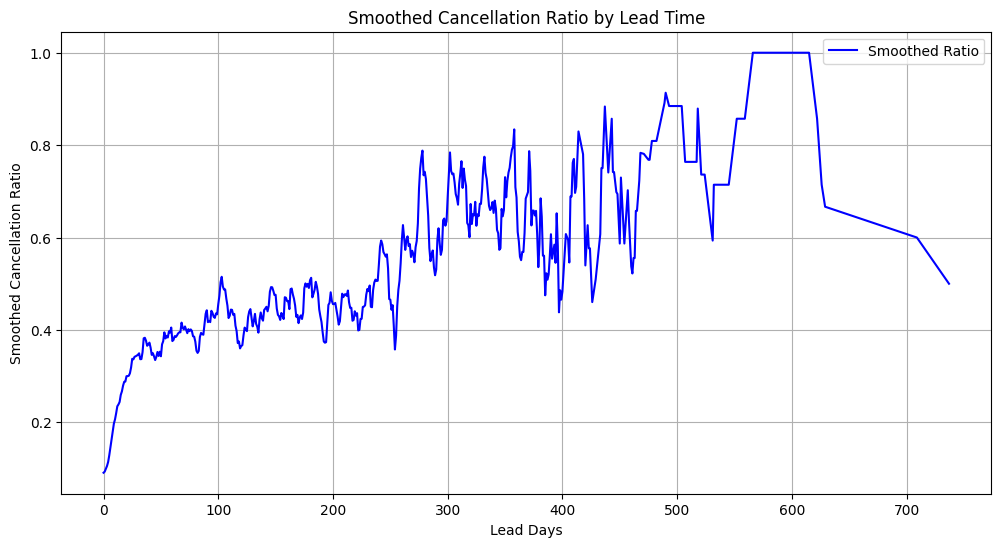

In [7]:
#Insight #3
# relacion entre cancelacion y reservas dado el tiempo antes de llegada

# Preparando la data agrupando por lead_time
grouped = df.groupby('lead_time').agg(
    total_bookings=pd.NamedAgg(column='is_canceled', aggfunc='count'),
    canceled_bookings=pd.NamedAgg(column='is_canceled', aggfunc='sum')
)

# Calculando ratio de cancelacion
grouped['cancellation_ratio'] = grouped['canceled_bookings'] / grouped['total_bookings']

# suavizamos la curva para facilitar la lectura de la grafica
window_size = 7 
grouped['smoothed_ratio'] = grouped['cancellation_ratio'].rolling(window=window_size, min_periods=1, center=True).mean()

# graficando
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped['smoothed_ratio'], linestyle='-', color='b', label='Smoothed Ratio')
plt.title('Cancellation Ratio by Lead Time')
plt.xlabel('Lead Days')
plt.ylabel('Smoothed Cancellation Ratio')
plt.grid(True)
plt.legend()
plt.show()


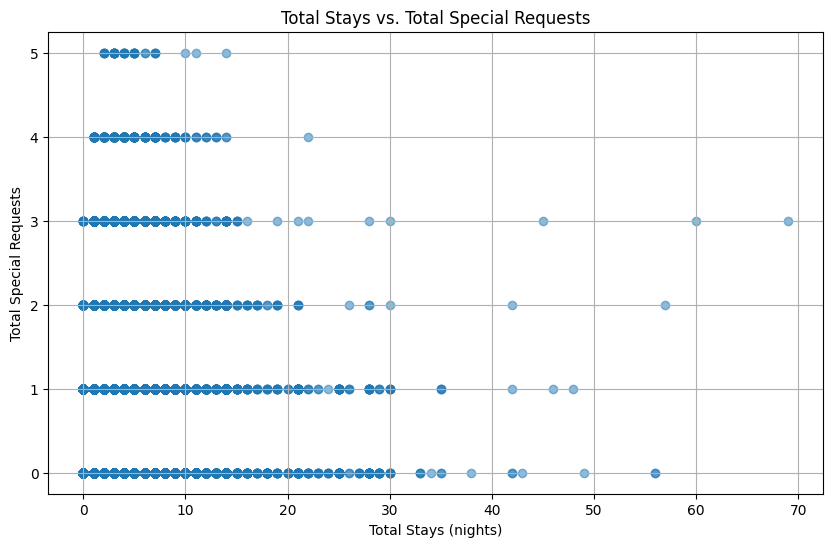

In [8]:
#Insight #3
# total de pedidos especiales vs noches totales

# calculando todas las noches
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# graficando
plt.figure(figsize=(10, 6))
plt.scatter(df['total_stays'], df['total_of_special_requests'], alpha=0.5)
plt.title('Total Stays vs. Total Special Requests')
plt.xlabel('Total Stays (nights)')
plt.ylabel('Total Special Requests')
plt.grid(True)
plt.show()

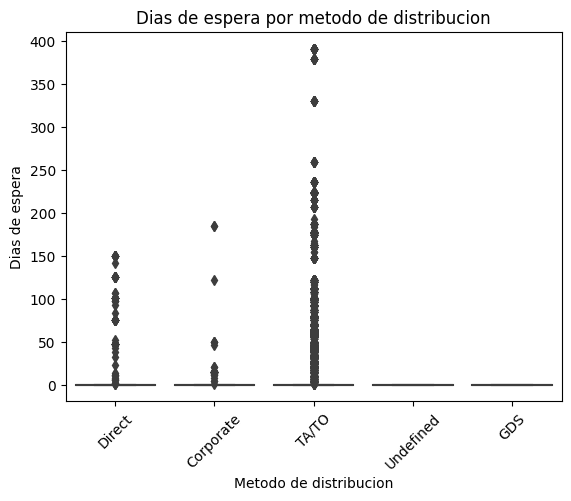

In [9]:
#Insight #4
# total de pedidos especiales vs noches totales

# boxplot con el eje X como el metodo de distribucion y Y como los dias de espera
sns.boxplot(x='distribution_channel', y='days_in_waiting_list', data=df)
plt.title('Dias de espera por metodo de distribucion')
plt.xlabel('Metodo de distribucion')
plt.ylabel('Dias de espera')
plt.xticks(rotation=45)
plt.show()

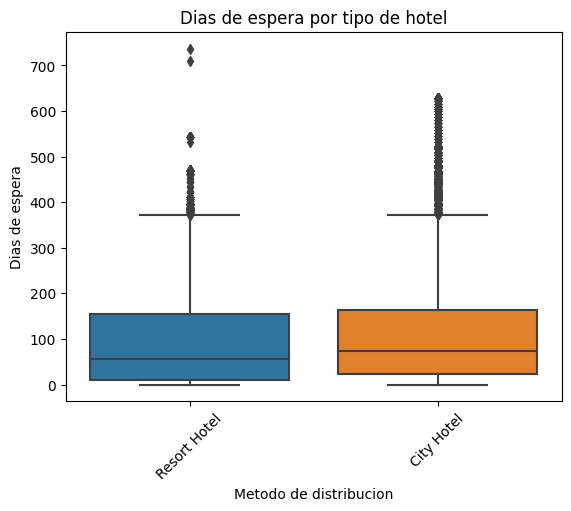

In [10]:
#Insight #5
# Dias de espera por tipo de hotel

# boxplot entre los tipos de hotel y el lead_time
sns.boxplot(x='hotel', y='lead_time', data=df)
plt.title('Dias de espera por tipo de hotel')
plt.xlabel('Metodo de distribucion')
plt.ylabel('Dias de espera')
plt.xticks(rotation=45)
plt.show()

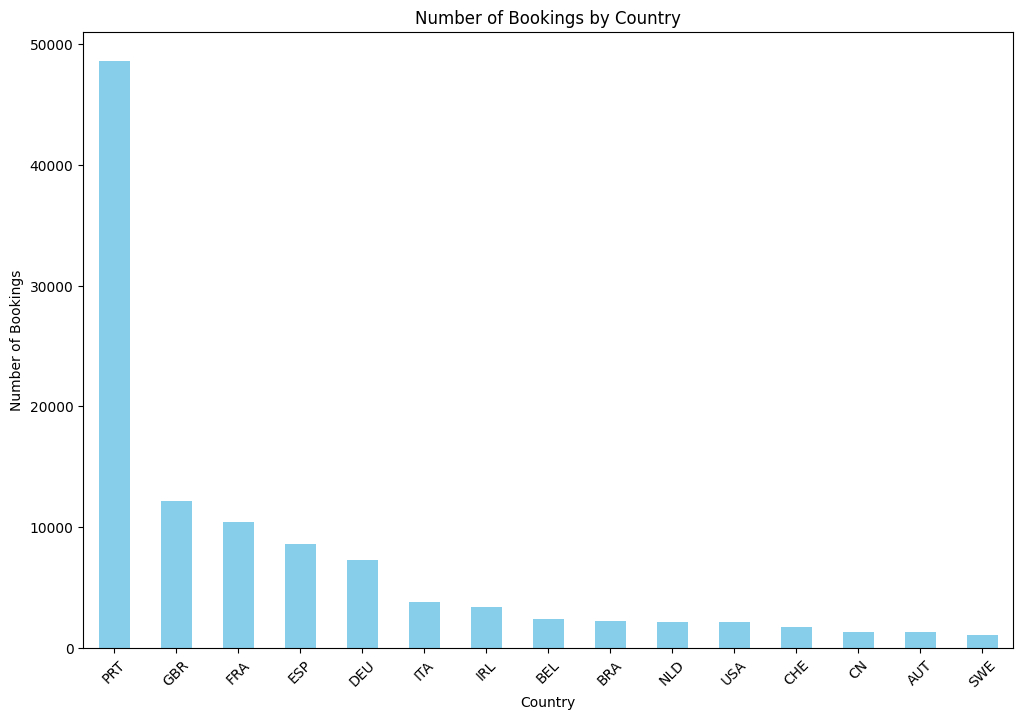

In [11]:
#Insight #6
# Numero de reservas por pais

# Agrupando los records por pais
bookings_by_country = df['country'].value_counts()

# Filtramos por solo los 15 primeros paises, son muchos los que tienen muy pocos valores
top_countries = bookings_by_country.head(15)
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Number of Bookings by Country')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  
plt.show()


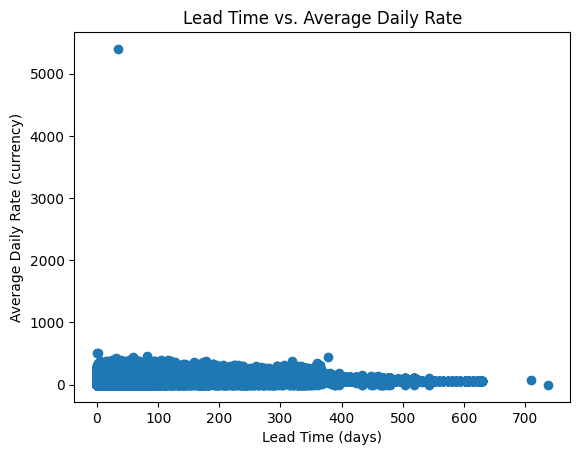

In [12]:
# Insight #7
# Lead time y ADR

plt.scatter(df['lead_time'], df['adr'])
plt.title('Lead Time vs. Average Daily Rate')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (currency)')
plt.show()
